In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
df = pd.read_csv('employee_churn_data.csv')
df.head(9540)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


In [3]:
data = df.copy()

***Exploratory Data Analysis (EDA)***

In [4]:
#Check missing data
df.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [5]:
# Department with sorted number of employee turnovers: from highest to lowest
no_turnover = df[df.left == 'yes'].groupby('department').left.count().sort_values()

no_turnover.to_frame()

,left
department,
finance,108
IT,110
logistics,111
admin,119
support,212
marketing,243
operations,436
engineering,437
retail,471


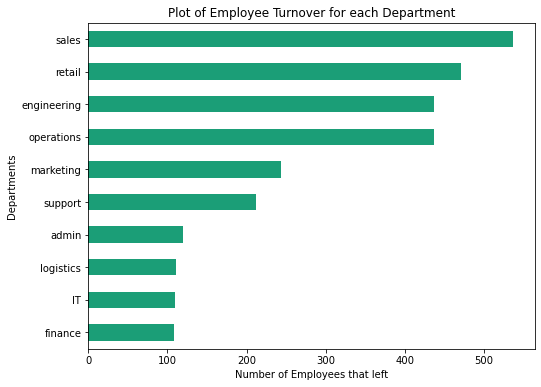

In [6]:
# Department with sorted number of employee turnovers: from highest to lowest

fig, ax = plt.subplots(figsize=(8, 6))
no_turnover.plot.barh(ax=ax, title="Plot of Employee Turnover for each Department", colormap='Dark2')
plt.xlabel("Number of Employees that left")
plt.ylabel("Departments")
plt.show()

**1. Which department has the highest employee turnover? Which one has the lowest?**

The Department with the highest number of employee turnover as seen above is the Sales department, while the departments with the least is the Finance and IT department.

In [9]:
# Percentage Employee Turnover per department
dept_turnover = df.groupby(["department", "left"]).department.count().unstack()
dept_turnover["employee_total"] = dept_turnover["no"] + dept_turnover["yes"]
dept_turnover["percentage_left"] = dept_turnover["yes"] / dept_turnover["employee_total"]
dept_turnover = dept_turnover.reset_index()
dept_turnover = dept_turnover.sort_values("percentage_left", ascending=True)

dept_turnover

left,department,no,yes,employee_total,percentage_left
3,finance,294,108,402,0.268657
1,admin,304,119,423,0.281324
8,sales,1346,537,1883,0.285183
6,operations,1086,436,1522,0.286465
2,engineering,1079,437,1516,0.288259
9,support,523,212,735,0.288435
5,marketing,559,243,802,0.302993
7,retail,1070,471,1541,0.305646
4,logistics,249,111,360,0.308333
0,IT,246,110,356,0.308989


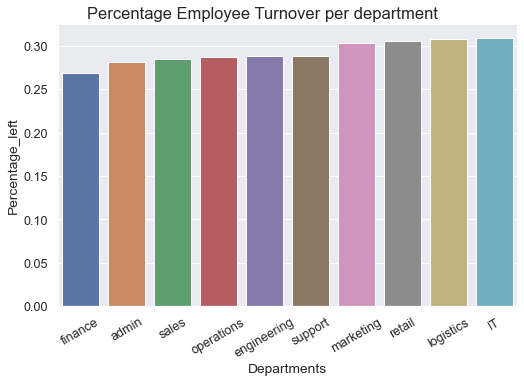

In [10]:
sns.set(font_scale=1.15)

# plt.figure(figsize=(12, 5))
ax = sns.catplot(x="department", y="percentage_left", data=dept_turnover, kind='bar', height=5.0, aspect=7.5/5.0)
ax.set_axis_labels('Departments', "Percentage_left")
ax.fig.suptitle('Percentage Employee Turnover per department')
plt.subplots_adjust(top=0.93)
plt.xticks(rotation=30)
plt.show()

The Percentage Employee Turnover is between 0.31 and 0.26, with the highest percentage from the IT department, 

this gives us insight into the rate of employee turnover/churn: highest in the IT department and lowest in the finance department

,promoted
0,0.969706
1,0.030294


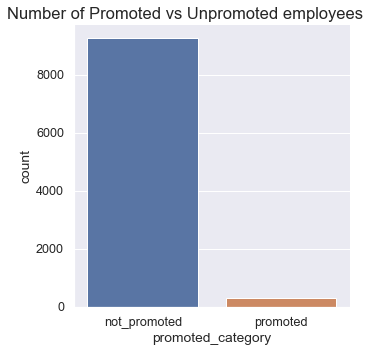

In [11]:
# Viewing Information about 24-month promotion of employees

display(df.promoted.value_counts(normalize=True).to_frame())

df['promoted_category'] = df.promoted.map({0:"not_promoted", 1: "promoted"})

ax = sns.catplot(x='promoted_category', kind='count', data=df)
ax.fig.suptitle('Number of Promoted vs Unpromoted employees')
plt.subplots_adjust(top=.93)
plt.show()

About 97% of the employees in the dataset have not been promoted in the last 24 months, only 3% have been promoted.

,promoted_category,left,perc
0,not_promoted,no,0.705221
1,not_promoted,yes,0.294779
2,promoted,no,0.802768
3,promoted,yes,0.197232


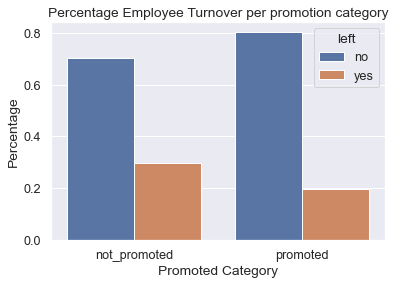

In [12]:
promoted_left = df.groupby('promoted_category').left.value_counts(normalize=True).to_frame(name='perc').reset_index()
display(promoted_left)

ax = sns.barplot(x='promoted_category', hue='left', y= 'perc', data=promoted_left)
ax.set_title('Percentage Employee Turnover per promotion category')
ax.set_xlabel('Promoted Category')
ax.set_ylabel('Percentage')
plt.show()

Of the unpromoted employees around 30% have left, while of the promoted employees around 20% have left.